## Keras Syntax Basics

With TensorFlow 2.0, Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layeres. 

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurement of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [12]:
df.head()
# data nya simple, cuma ada harga sama 2 features

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


jadi aim/goal kita adalah buat predict harga benda nya kalo di kasih 2 feature ini berdasarkan history dari dataset nya, anggep aja harga gem

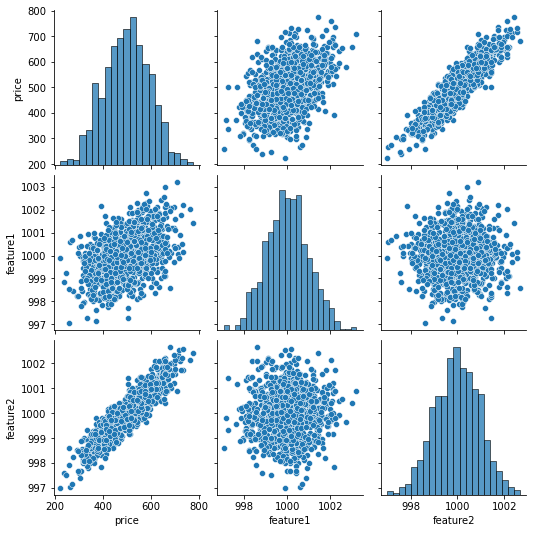

In [11]:
sns.pairplot(df)
# kita liat hubungan dari fiturnya sama harganya
# bisa di liat feature2 itu berhubungan banget sama harganya

In [13]:
# skrg kita train test split
from sklearn.model_selection import train_test_split

kita bakal grab features nya dlu

In [14]:
# untuk tensorflow keras
# kita perlu convert dari Pandas jadi Numpy

In [15]:
X = df[['feature1','feature2']]

In [18]:
# ini dataframe pandas, harus kita jadiin numpy array, caranya gampang
# tinggal tambah .values
type(X)

pandas.core.frame.DataFrame

In [19]:
type(X.values)

numpy.ndarray

In [20]:
# jadi gini convertnya

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# 70%
X_train.shape

(700, 2)

In [22]:
# 30%
X_test.shape

(300, 2)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

ga perlu scale labelnya soalnya yang di passed in ke neural networknya cuma feature nya, labelnya cuma buat perbandingan jadi ga perlu

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
help(MinMaxScaler)
# jadi intinya semua valuenya di scale jadi range 0-1

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [25]:
# kita buat variable baru (biasanya scaler)
scaler = MinMaxScaler()

In [26]:
# Notice to prevent data leakage from the test set, 
# we only fit our scaler to the training set

# Inget jangan fit pake test set, biar ga cheat ngeliat test set nya

In [27]:
# jadi kita fit scalernya ke training setnya aja
# habis itu baru transform ke training sama testnya
scaler.fit(X_train)

MinMaxScaler()

In [34]:
# kita liat value nya sebelum di scale
X_train[:5]

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       [1000.35516374, 1002.20349379],
       [1000.3522229 ,  999.18061663]])

In [35]:
X_test[:5]

array([[ 999.54121558,  999.14114328],
       [1000.61862216, 1001.11905081],
       [1000.86079375, 1000.65496339],
       [ 999.45851362, 1001.06368241],
       [ 997.61547597,  999.57440788]])

In [36]:
# skrg kita scale
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# cek valuenya lagi, jadi range 0-1
X_train[:5]

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       [0.52955895, 0.93551377],
       [0.52907398, 0.39249753]])

In [39]:
X_test[:5]

array([[0.39533339, 0.38540671],
       [0.57300502, 0.74070924],
       [0.61294076, 0.65734264],
       [0.38169528, 0.73076311],
       [0.07776591, 0.46323644]])

In [41]:
X_train.max()

1.0

In [42]:
X_train.min()

0.0

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [6]:
import tensorflow as tf

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [45]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

ada 2 cara buat bikin models pake TF 2 Keras API

### Model - as a list of layers

In [49]:
# cara 1
# jadi bikin modelnya, terus langsung masukin layers sebagai list di parameter modelnya

# note: DENSE itu layer yg semua neuronnya ke connect
# parameter dense yg kita pake, units(jumlah neuronnya), activation(activation functionnya kayak sigmoid, relu, dll)

model = Sequential([
    Dense(4,activation='relu'),
    Dense(2,activation='sigmoid'),
    Dense(1)
])

### Model - adding in layers one by one (preferred method)

In [50]:
# cara 2, pake yang ini aja

# benefitnya dia sebaris2, jadi kalo misal kita mau matiin layersnya gampang tinggal di comment

# bikin model kosong dlu, habis itu tinggal di add tiap layer

model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1))


skrg kita buat simple model buat predict harga gem nya

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [52]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node nya 1, karena kita prediksi harga, jadi kita maunya output 1 value
model.add(Dense(1))

# buat compile, kita skrg cuma pake optimizer sama loss (BACA NOTES ATAS)
# buat detail boleh google atau baca documentation
# karena ini regression problem, jadi pake mse lossnya
model.compile(optimizer='rmsprop',loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [53]:
# skrg kita training

# penjelasan di atas

# disini cuma kepake 3 variable
# x,y nya udah jelas X_train sama y_train
# epochs itu brp kali kita run through datasetnya, 1 epoch itu 1 kali

# terus ada verbose, default 1 itu buat jumlah informasi yg mau di display pas dia run trainingnya
# kalo 0 berarti pas kita run cellnya ga muncul apa, mending jangan 0 biar kita tau

In [54]:
# nanti kita bakal cari tau cara buat nentuin jumlah epochs yg bener
model.fit(X_train,y_train,epochs=250)

Epoch 1/250


2022-09-08 15:40:58.548339: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-08 15:40:59.263592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 2s 6ms/step - loss: 256394.2344
Epoch 2/250
22/22 [==============================] - 0s 5ms/step - loss: 256014.6875
Epoch 3/250
22/22 [==============================] - 0s 6ms/step - loss: 255699.3594
Epoch 4/250
22/22 [==============================] - 0s 5ms/step - loss: 255354.3125
Epoch 5/250
22/22 [==============================] - 0s 6ms/step - loss: 254962.8125
Epoch 6/250
22/22 [==============================] - 0s 6ms/step - loss: 254522.1406
Epoch 7/250
22/22 [==============================] - 0s 6ms/step - loss: 254028.5000
Epoch 8/250
22/22 [==============================] - 0s 6ms/step - loss: 253475.8594
Epoch 9/250
22/22 [==============================] - 0s 6ms/step - loss: 252867.7031
Epoch 10/250
22/22 [==============================] - 0s 6ms/step - loss: 252194.6250
Epoch 11/250
22/22 [==============================] - 0s 5ms/step - loss: 251454.4688
Epoch 12/250
22/22 [==============================] - 0s 6ms/step - loss: 2

bisa kita liat lossnya makin lama makin kecil

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [55]:
model.history.history

{'loss': [256394.234375,
  256014.6875,
  255699.359375,
  255354.3125,
  254962.8125,
  254522.140625,
  254028.5,
  253475.859375,
  252867.703125,
  252194.625,
  251454.46875,
  250623.90625,
  249697.375,
  248663.8125,
  247501.390625,
  246202.421875,
  244761.234375,
  243171.0625,
  241412.953125,
  239485.421875,
  237379.171875,
  235073.5,
  232563.46875,
  229868.25,
  226942.265625,
  223786.625,
  220404.890625,
  216772.640625,
  212852.84375,
  208691.5,
  204301.671875,
  199601.875,
  194646.6875,
  189379.875,
  183882.734375,
  178098.234375,
  172048.96875,
  165712.265625,
  159119.328125,
  152256.953125,
  145225.75,
  137935.5,
  130389.90625,
  122699.1796875,
  114834.1015625,
  106834.890625,
  98742.0546875,
  90624.890625,
  82422.234375,
  74257.8046875,
  66198.9140625,
  58259.6796875,
  50551.484375,
  43126.96875,
  35977.80078125,
  29293.59375,
  23171.669921875,
  17616.16015625,
  12778.1044921875,
  8757.8916015625,
  5602.47021484375,
  3394.72

In [56]:
# biar lebih rapih kita jadiin dataframe
loss_df = pd.DataFrame(model.history.history)

In [57]:
loss_df

,loss
0,256394.234375
1,256014.687500
2,255699.359375
3,255354.312500
4,254962.812500
...,...
245,24.114096
246,24.659758
247,24.575418
248,24.623360


In [58]:
# atau jadiin list buat di display plotnya
loss = model.history.history['loss']

In [59]:
type(loss)

list

Text(0.5, 1.0, 'Training Loss per Epoch')

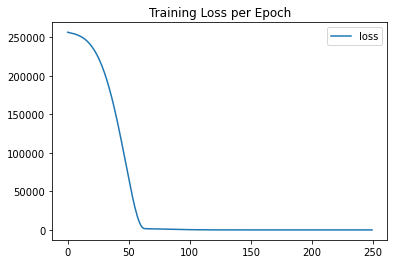

In [62]:
loss_df.plot()
plt.title("Training Loss per Epoch")

bisa kita liat losssnya itu bakalan turun terus sampe 1 titik udah ga bisa improve lagi

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [67]:
model.metrics_names

['loss']

In [65]:
# salah satu caranya

# jadi kita test modelnya ke data yg blom pernah di liat, yaitu test set
# kita dapet loss (mean squared error) = 25.86
test_score = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 25.8598


In [66]:
# bisa juga di test ke training set
training_score = model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 3ms/step - loss: 25.6871


### Further Evaluations

In [68]:
# cara berikutnya ini kita bisa liat MAE, MSE, sama RMSE nya
# caranya pake .predict
test_predictions = model.predict(X_test)

2022-09-08 19:20:07.963339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [69]:
# ini np.array
test_predictions

array([[404.33475],
       [622.31537],
       [590.94794],
       [571.06146],
       [365.70197],
       [578.0087 ],
       [513.95514],
       [458.08923],
       [548.10895],
       [446.5163 ],
       [610.57623],
       [547.82086],
       [418.1274 ],
       [407.90875],
       [649.99115],
       [436.30698],
       [507.37625],
       [658.6564 ],
       [661.30853],
       [564.3879 ],
       [333.35663],
       [443.82977],
       [381.5969 ],
       [377.8332 ],
       [565.44086],
       [609.3803 ],
       [531.27814],
       [426.87833],
       [654.1766 ],
       [413.11874],
       [441.63824],
       [484.07477],
       [437.4193 ],
       [680.54913],
       [423.78387],
       [416.71304],
       [500.8614 ],
       [549.3422 ],
       [508.6443 ],
       [394.4077 ],
       [617.37506],
       [415.66183],
       [603.2504 ],
       [444.96036],
       [500.91507],
       [580.55164],
       [667.7271 ],
       [489.34613],
       [317.73456],
       [484.3731 ],


skrg kita bakal coba bikin perbandingan X_test sama y_test terus kita bisa plot jadi bisa compare

In [71]:
# kita jadiin pandas Series dlu
test_predictions = pd.Series(test_predictions)

In [72]:
# skrg jadi series
test_predictions

0      404.334747
1      622.315369
2      590.947937
3      571.061462
4      365.701965
          ...    
295    527.934021
296    514.228760
297    608.445374
298    415.989044
299    409.911133
Length: 300, dtype: float32

In [76]:
# skrg kita buat DataFrame buat y_test
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [77]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [78]:
# skrg kita concat(gabungin) sama X_test
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [80]:
# yang X_test nya blom ada nama columnnya, kita tambahin dlu
pred_df

,Test True Y,0
0,402.296319,404.334747
1,624.156198,622.315369
2,582.455066,590.947937
3,578.588606,571.061462
4,371.224104,365.701965
...,...,...
295,525.704657,527.934021
296,502.909473,514.228760
297,612.727910,608.445374
298,417.569725,415.989044


In [81]:
pred_df.columns = ['Test Y','Model Predictions']

In [82]:
# skrg kita bisa bandingin kanan kiri
pred_df

,Test Y,Model Predictions
0,402.296319,404.334747
1,624.156198,622.315369
2,582.455066,590.947937
3,578.588606,571.061462
4,371.224104,365.701965
...,...,...
295,525.704657,527.934021
296,502.909473,514.228760
297,612.727910,608.445374
298,417.569725,415.989044


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

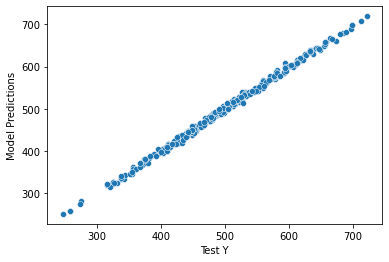

In [84]:
# skrg kita coba plot
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

bisa kita liat hampir lurus sejajar, emang goalnya harus nya garis lurus sejajar karena harusnya kan value keduanya deket atau bahkan hampir sama, jadi ini prediction yang sangat bagus kalo di liat dari plot nya

In [86]:
# skrg kita coba hitung errornya, selisih test Y sama model predictions berarti
# kita buat column baru
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

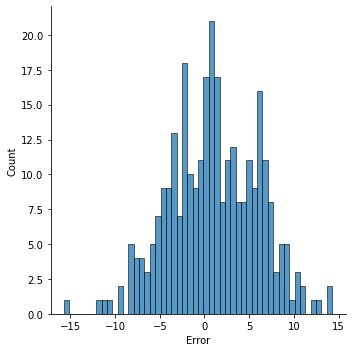

In [90]:
# kita plot errornya
sns.displot(pred_df['Error'],bins=50)

In [91]:
# skrg kita liat MAE. MSE, sama RMSE nya
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [92]:
help(mean_absolute_error)

Help on function mean_absolute_error in module sklearn.metrics._regression:

mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    Mean absolute error regression loss.
    
    Read more in the :ref:`User Guide <mean_absolute_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average'}  or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        '

In [93]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.076087113138874

skrg pertanyaannya:
### Berapa MAE yang bagus?
jawabannya:
### Tergantung, konteksnya.

In [94]:
# contoh di case ini kita predict harga gem
# kita coba liat dataframenya

# kita liat harganya
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [95]:
# coba kita describe
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


bisa di liat harganya average 498

terendah 223

tertinggi 774

jadi MAE 4 itu artinya kita off sekitar 4 dollar, berarti itu cuma kayak <1% nya dari averagenya, artinya predictions nya itu bagus banget.

Tapi kalo konteksnya harga permen misalkan yang range harganya mungkin 1-4 dollar, terus MAE nya 4, itu berarti predictions nya off 100-400%, itu buruk banget

#### Jadi tergantung konteksnya

In [96]:
# skrg kita liat MSE nya
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.85979032417159

In [97]:
# hasilnya itu sama kayak yang di atas pas kita evaluate
# soalnya pas kita evaluate lossnya, model yang kita buat kita udah set lossnya='mse'
# jadi basically kalo kita evaluate itu exactly the same kayak liat MSE nya manual

In [98]:
# RMSE nya kita tinggal root aja MSE nya
np.sqrt(mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions']))

5.085252238008612

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [99]:
# skrg misal kita nemuin gem di jalan(brand new data), 
# terus kita pengen tau value harganya dengan cara tanya ke model yg kita buat
# [[Feature1,Feature2]]
new_gem = [[998,1000]]

In [100]:
# inget karena model kita predict scaled data, kita harus scale dlu
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [101]:
new_gem = scaler.transform(new_gem)

In [102]:
model.predict(new_gem)

array([[418.7071]], dtype=float32)

## Saving and Loading a Model

In [106]:
from tensorflow.keras.models import load_model

In [107]:
# SAVE
model.save('my_model.h5') # creates a HDF5 file 'my_model.h5'

In [108]:
# LOAD
# kita laod ke variable baru
loaded_model = load_model('my_model.h5')

In [109]:
# terus kita coba predict new gemnya
loaded_model.predict(new_gem)

# hasil nya sama

2022-09-08 20:03:27.340197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[418.7071]], dtype=float32)